## Titanic tutorial #1-2  - tutorial by 이유한님 + dietanic modeling

- 이유한 EDA 그대로 사용하고 + dietanic 의 모델링 파트만 필사함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)  #필자가 항상 쓰는 방법이람.

In [3]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


앞으로 우리가 해야할 프로세스

1. 데이터셋 확인 - null 데이터의 확인 및 수정
2. 탐색적 데이터 분석 - 여러 피처들을 개별분석 / 피처간의 상관관계 확인. 여러 시각화를 이용하여 인사이트를 얻는다.
3. feature engineering - 모델 세우기에 앞서, 모델 성능을 높일수있도록 feature들을 engineering한다. one-hot encoding, class로 / 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기 - sklearn을 이용해 만든다. sklearn을 이용하면 많은 알고리즘을 일관된 문법으로 사용 가능하다. 물론 tensorflow, pytorch를 사용할 수도 있다.
5. 학습 및 예측 - trainset으로 모델 학습시킨 후, testset을 가지고 prediction 한다.
6. 모델 평가 - 예측 성능을 원하는 수준인지 확인한다. 모델이 어떤 것을 학습하였는지도 확인해 본다.

### 1. 데이터셋 확인

In [4]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.1 Null data 체크하기

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- missingno 패키지를 활용해서 null data 를 더 쉽게 볼 수 있다

<AxesSubplot:>

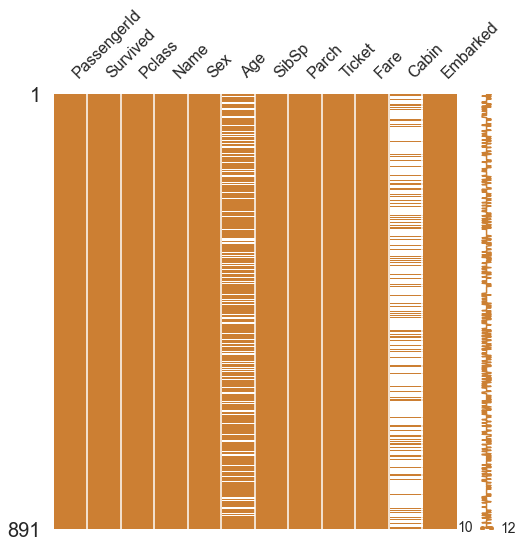

In [8]:
msno.matrix(df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

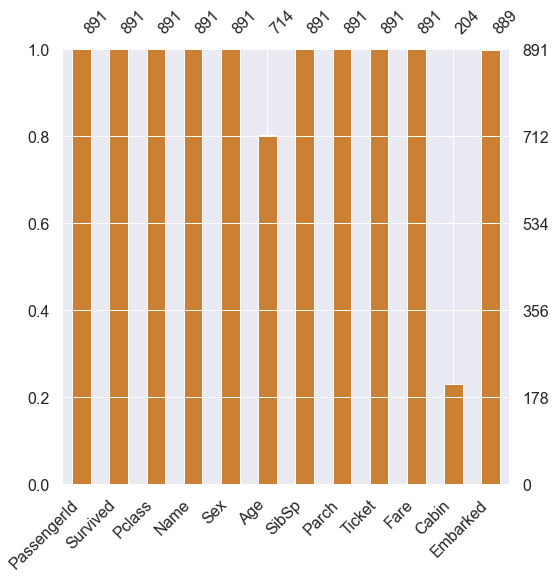

In [9]:
msno.bar(df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

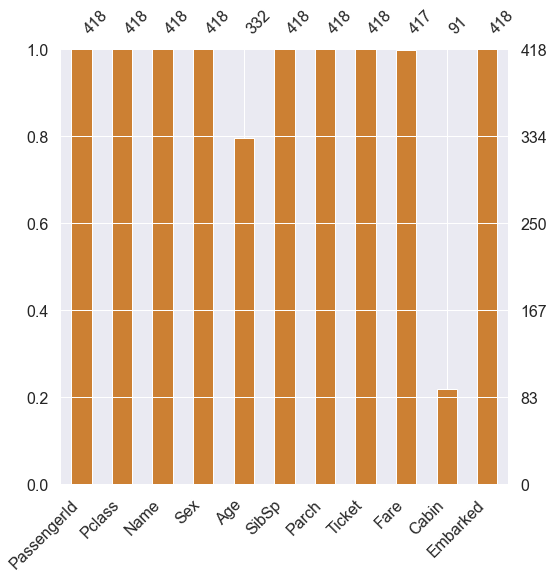

In [10]:
msno.bar(df_test, figsize=(8,8), color=(0.8, 0.5, 0.2))

#### 1.2 Target label 확인
- target (생존율) 이 어떤 분포를 갖는지 확인해야 한다.
- 1 / 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음.

Text(0.5, 1.0, 'Count plot - Survived')

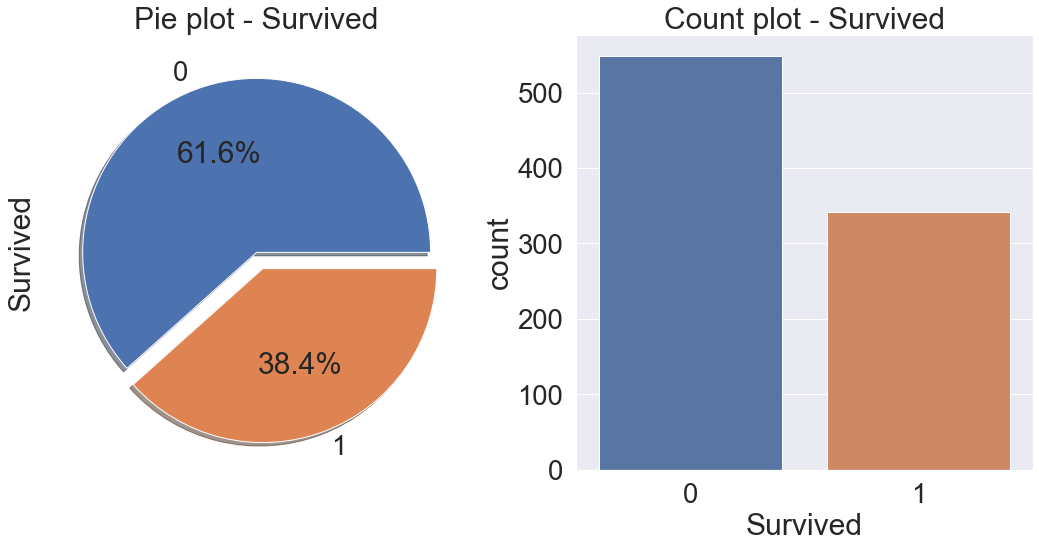

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                             autopct='%1.1f%%', ax=ax[0],
                                            shadow=True)
ax[0].set_title('Pie plot - Survived')
# ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

- target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

### 2. 탐색적 데이터 분석
- 적절한 시각화가 필요
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 목적에 맞게 잘 뽑아쓰자.

#### 2.1 Pclass
- 먼저 pclass에 따른 생존률 차이를 살펴본다. groupby를 사용하여 피벗 차트와 같은 기능을 사용한다. pivot 이라는 메소드도 있다.
- Pclass, survived 를 가져온 후 pclass로 묶는다. 그러면 pclass별 생존률이 나옴

In [12]:
# 총 인원수
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# 생존인원
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# pd crosstab을 이용하면 좀더 수월
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
           margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면 "1의 합 / 모든 사람 수" 가 되므로 각 클래스별 생존률을 얻을 수 있다. 

<AxesSubplot:xlabel='Pclass'>

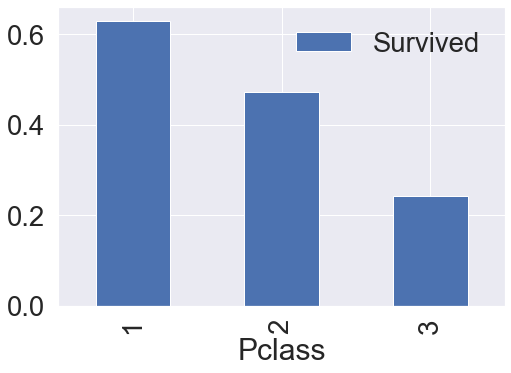

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).\
mean().sort_values(by='Survived', ascending=False).plot.bar()

- 결과 : Pclass 가 높을 수록 생존률이 높다. 

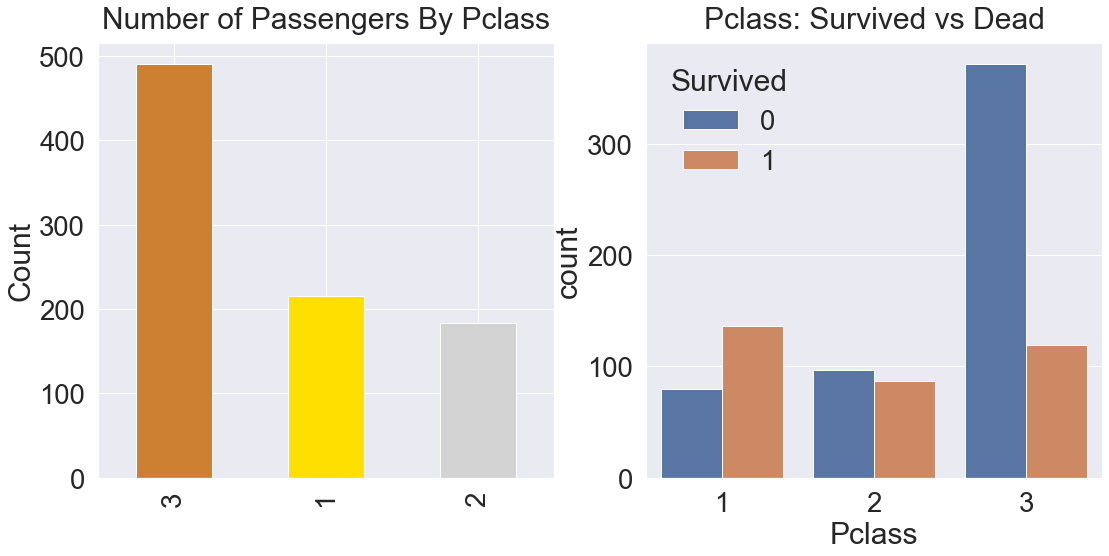

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',
             data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',
               y=y_position)
plt.show()

#### 2.2 Sex
- 성별에 따른 생존률

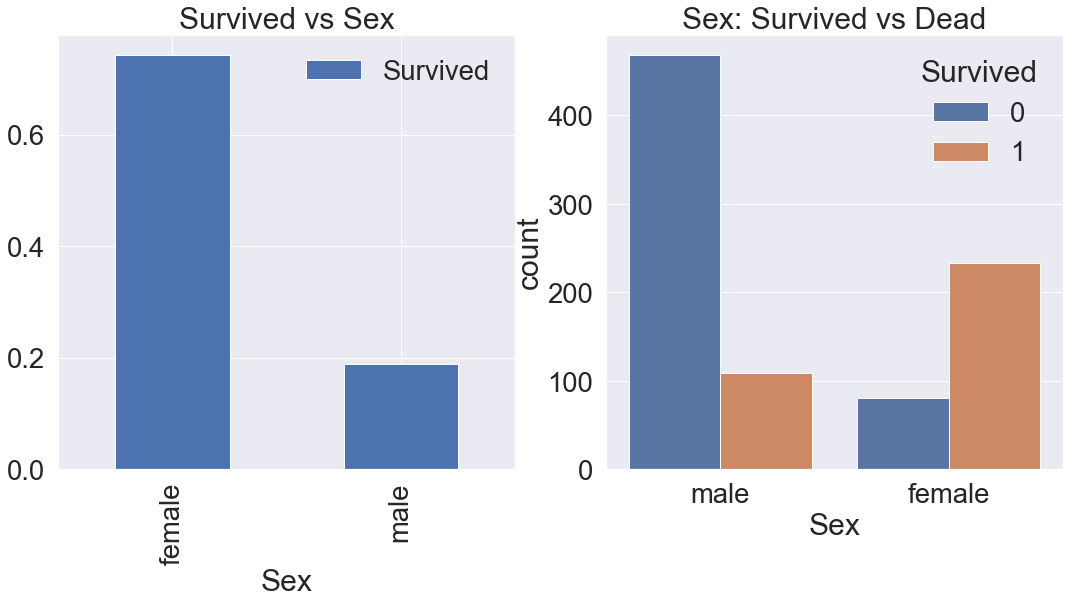

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=True).\
mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train,
             ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).\
mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).\
style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 여성이 생존률이 훨씬 높으므로 중요하다는 것을 알 수 있다.

#### 2.3 Both Sex and Pclass
- sex, pclass 두가지에 대하여 생존이 어떻게 달라지는 지 확인해 보자. 
- seaborn -> factorplot을 이용하면 손쉽게 3차원 그래프를 그릴 수 있다.

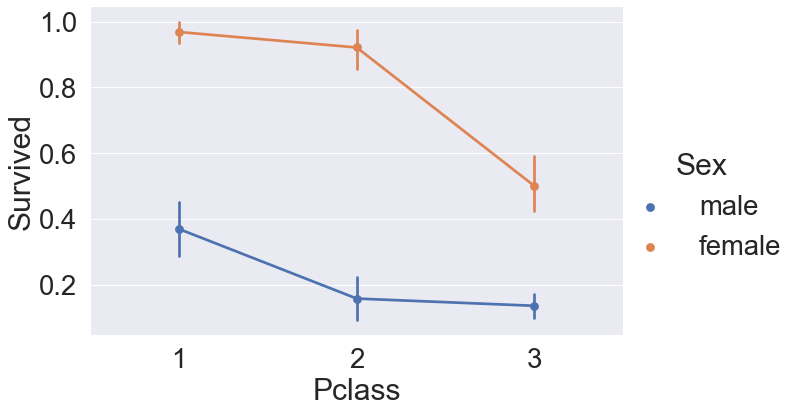

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex',
              data=df_train, size=6, aspect=1.5)

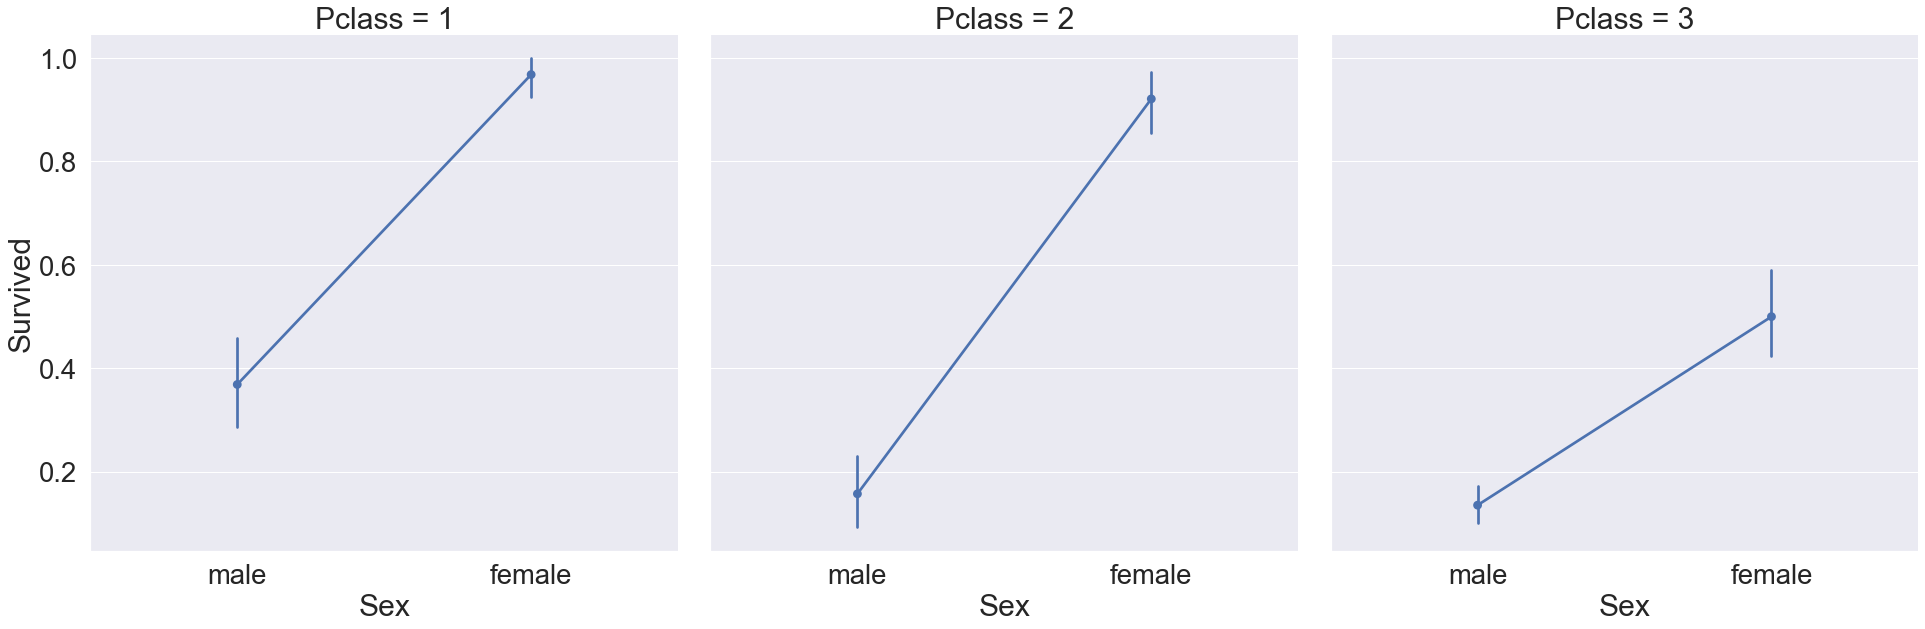

In [21]:
sns.factorplot('Sex','Survived', col='Pclass',
              data=df_train, saturation=.5,
               size=9, aspect=1)

#### 2.4 Age
- age feature / age histogram

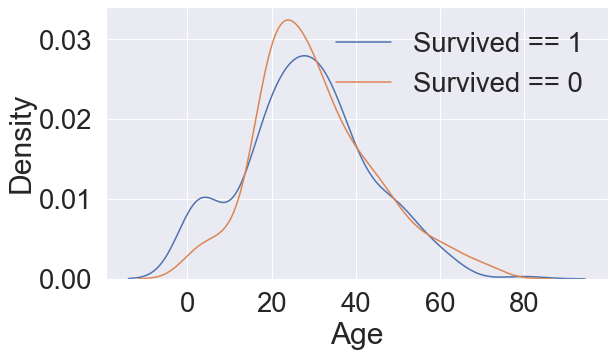

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 상대적으로 많음(비율이 높음)을 볼 수 있다.

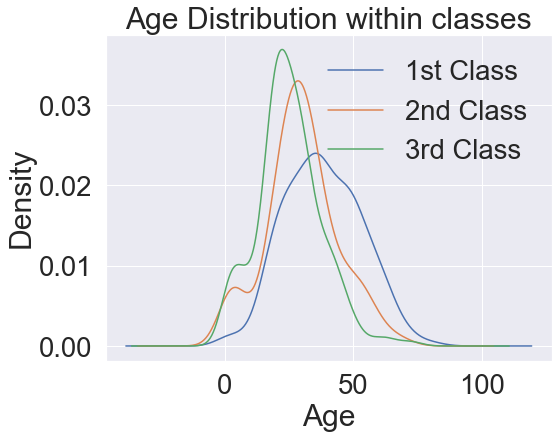

In [23]:
# Age distribution within classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class', '3rd Class'])


- Class 가 높을 수록 나이가 많음
- 나이대가 변하면서 생존률이 어떻게 되는지 보자 / 나이범위를 넓혀가며 생존률이 어떻게 되는지 보자.

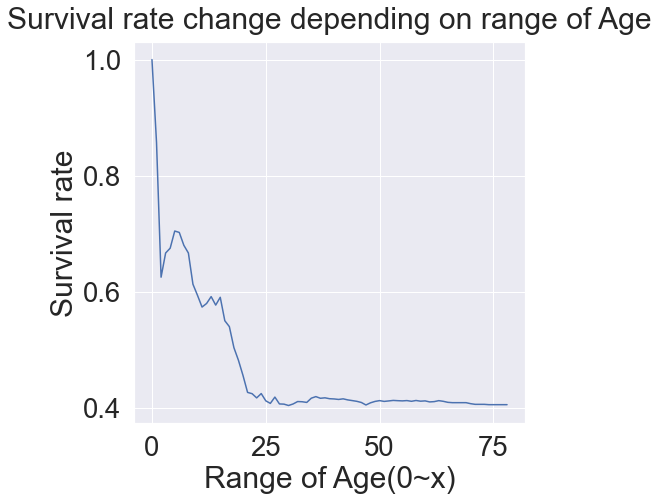

In [24]:
cumulate_survival_ratio = []
for i in range(1, 80):
    cumulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / \
                                  len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cumulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 위 그래프와 같이, 나이가 어릴 수록 확실히 생존률이 높음을 알 수 있다. 즉 나이는 중요한 feature로 학습될 수 있다.

#### 2.5 Pclass, Sex, Age
- Sex, Pclass, Age, Survived 모두에 대해 보고싶다 -> seaborn.violinplot()
- x축 : Pclass,Sex. y축 : distribution(age)

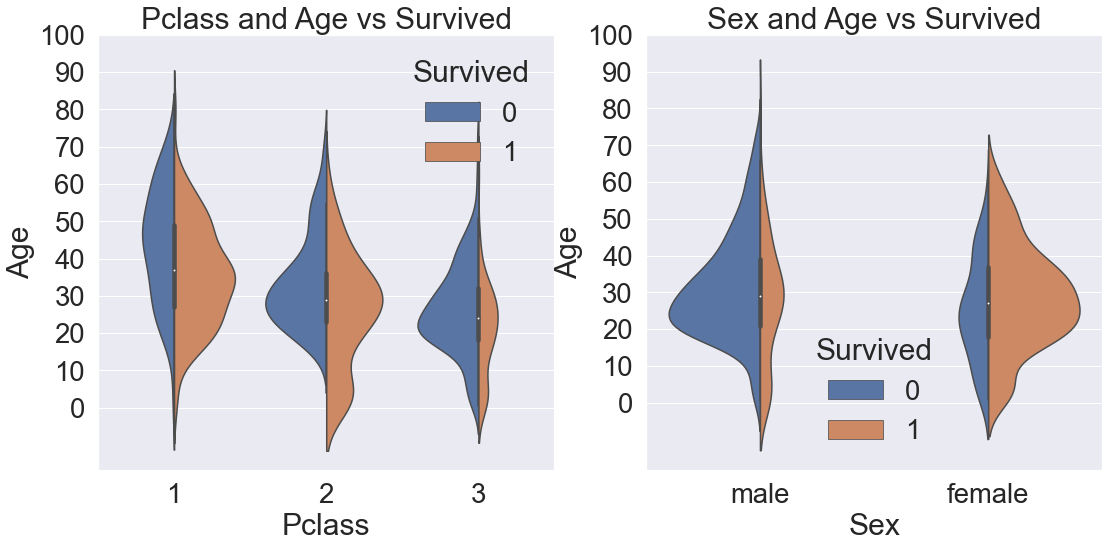

In [25]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train,scale='count',
              split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train,scale='count',split=True,
              ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 : Pclass별로 Age 의 분포가 어떻게 다른지, 그리고 생존여부의 분포
- 오른쪽 : Sex, 연령에 따른 분포가 어떻게 다른지 보여줌
- 여자가 생존을 많이 했고 어린 아이도 생존이 많았다.

#### 2.6 Embarked
- Embarked - 탑승한 항구를 나타냄
- 항구에 따른 생존률을 체크한다.

<AxesSubplot:xlabel='Embarked'>

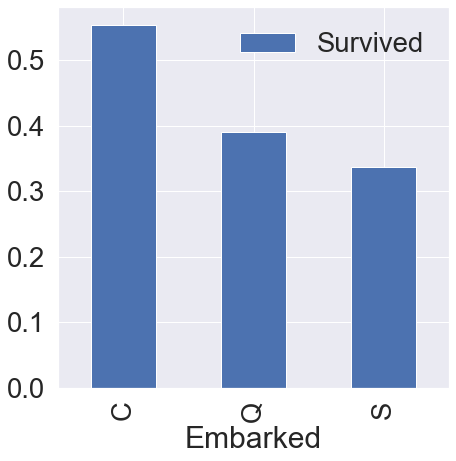

In [26]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).\
mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 큰 차이는 없지만 유의미한 차이를 보이므로 모델링에 사용하기로 한다.
- 다른 feature들도 한번 살펴보자

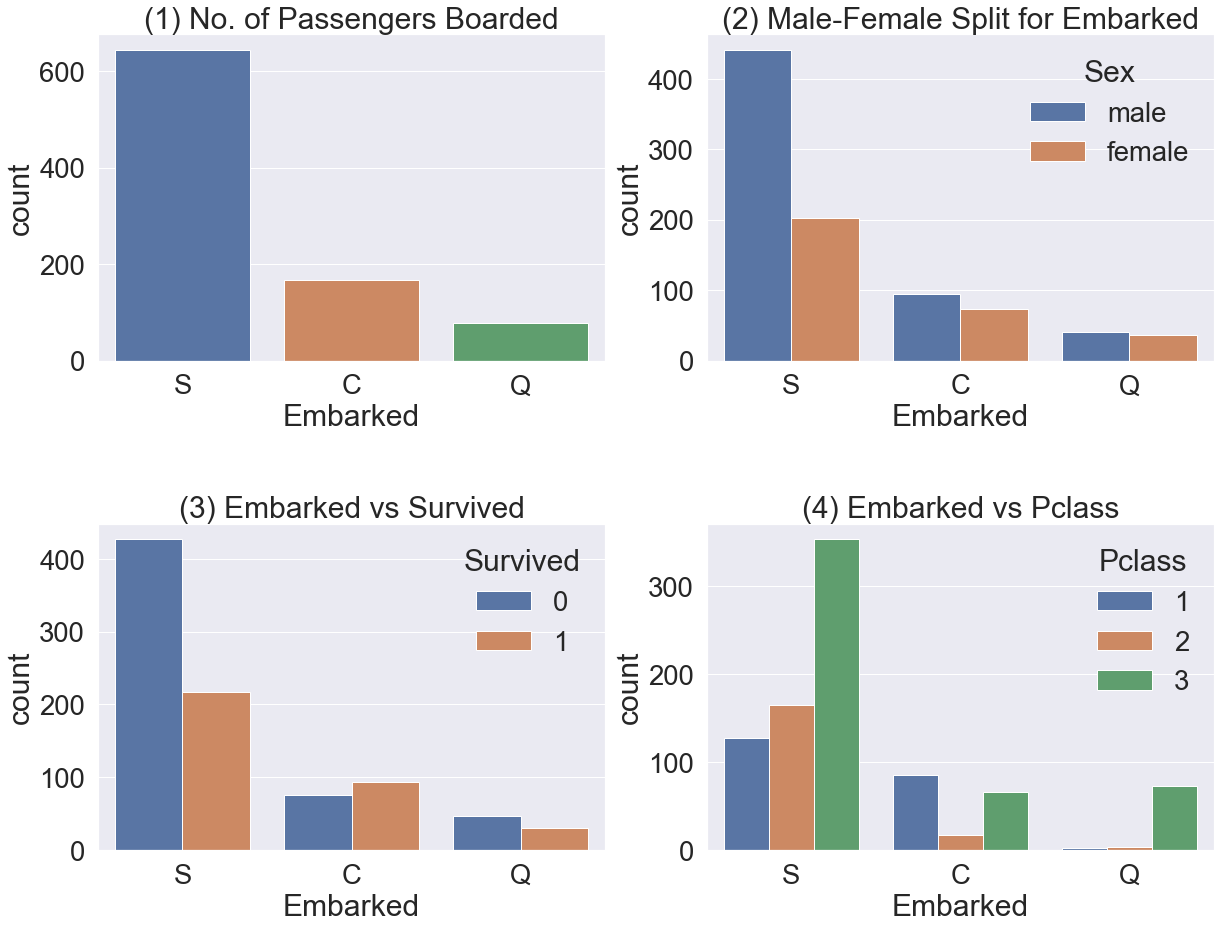

In [27]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked',hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 2.7 Family - SibSp (형제자매) + Parch (부모, 자녀)\
형제자매 + 부모나 자녀 + 본인 합하면 family size가 될것이다.

In [28]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [29]:
print("max size of Family: ",df_train['FamilySize'].max())
print("min size of Family: ",df_train['FamilySize'].min())

max size of Family:  11
min size of Family:  1


- Familysize 와 생존의 관계

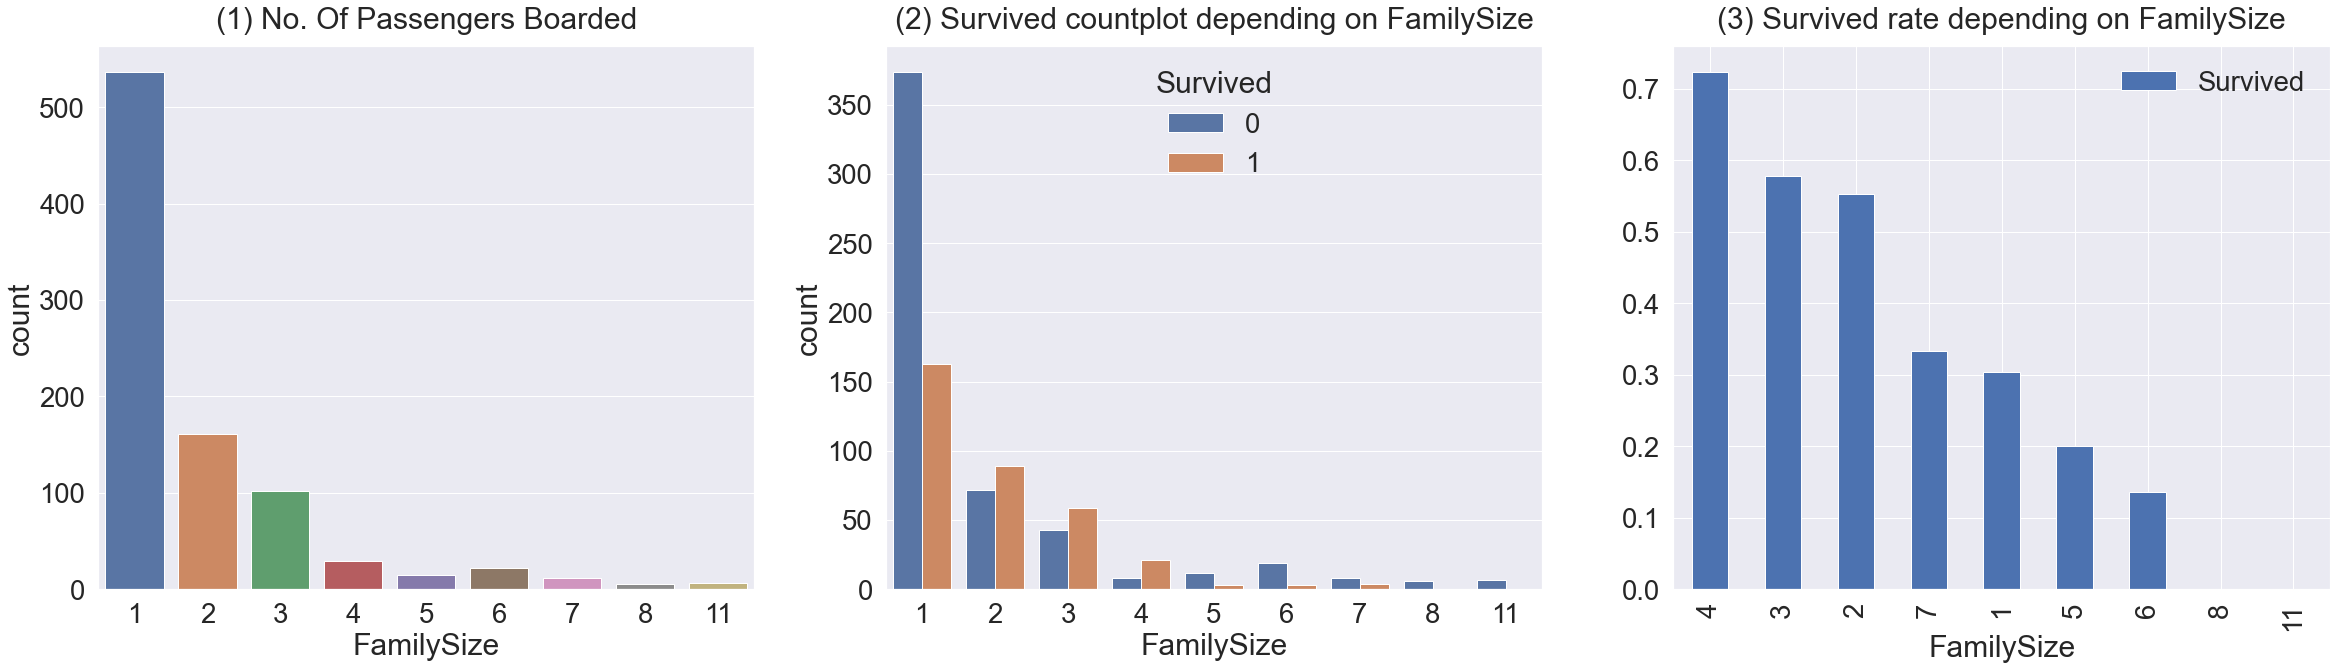

In [30]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).\
mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- null값 먼저 채워줘야 한다..
- 가족 크기에 따른 생존비교는 유의미하다.

#### 2.8 Fare
- Fare (탑승요금) 는 연속적인 데이터다. histogram 을 그려본다.

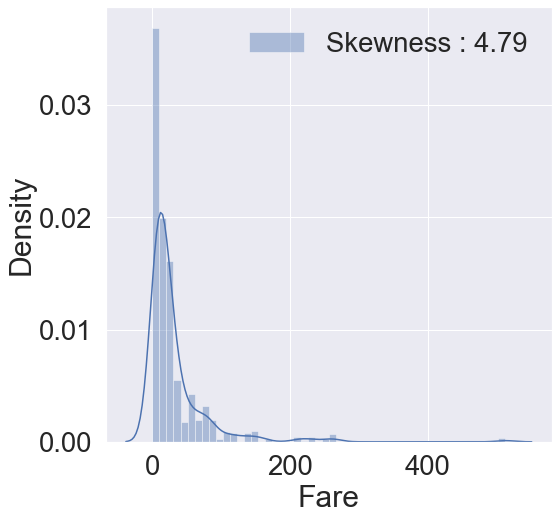

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), 
                                                ax=ax)
g = g.legend(loc='best')


- skewness 가 매우 크고 비대칭이다. 몇 outlier에 잘못 학습될 수 있으므로, log를 취해서 전체 분포의 skewness를 줄인다.
- df.apply (df.map)를 이용한다.

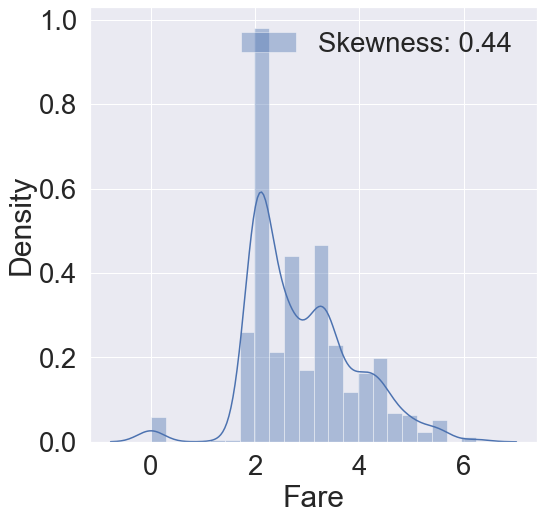

In [32]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format\
                (df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- skewness 많이 사라짐


#### 2.9 Cabin
- NaN값이 너무 많음. 모델 포함 X

#### 2.10 Ticket
- string data 이므로 작업을 따로 하려면 아이디어 필요.
- 넘어가도록 하자..






### 3. Feature Engineering

- null data 채우기
- 아무거나 (가령 0)으로 채우면 안되고, feature 의 통계량을 고려하여 채워주어야 한다.
- Train + Test 둘 다 null data 채워주어야 함. 같은 방식으로!

#### 3.1 Fill Null
##### 3.1.1 Fill Null in Age using title

- Age 에 결측치가 많으므로 이를 채우는 방법을 생각해보자.
- 여기서는 title + statistics를 이용한다.
- 정규표현식 이용 (이거는 한번 공부해보기)

In [33]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')


- pandas Crosstab을 이용하여 initial, sex 간의 count 를 살펴보자.

In [34]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(
cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 남자 / 여자 가 쓰는 initial 을 구분하자
- replace를 쓴다.

In [35]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [36]:
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [37]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


 - 여성과 관계있는 이니셜이 생존률이 높다.

<AxesSubplot:xlabel='Initial'>

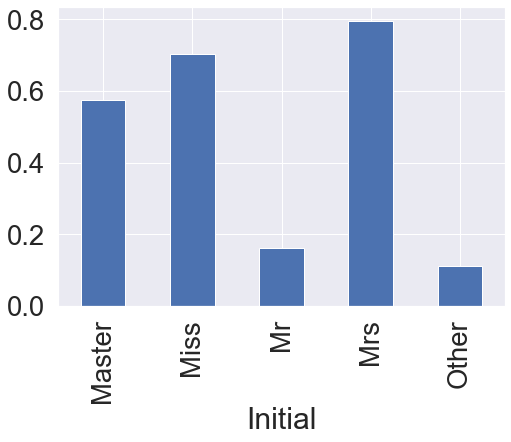

In [38]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- Null 채우기
- train set 에서 얻은 통계치를 바탕으로 test 의 null data 를 채워야 한다. test 는 실전에서 우리가 볼 수 없기 때문이다.

In [39]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age 의 평균을 이용해 null 값을 채운다.

In [40]:
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Mr'),'Age'] = 33

df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Mrs'),'Age'] = 36

df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Master'),'Age'] = 5

df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Miss'),'Age'] = 22

df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Other'),'Age'] = 46

df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Mr'),'Age'] = 33

df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Mrs'),'Age'] = 36

df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Master'),'Age'] = 5

df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Miss'),'Age'] = 22

df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Other'),'Age'] = 46



##### 3.1.2 Fill Null in Embarked

In [41]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


2개밖에 안 비므로 그냥 제일 많이 나온 S 로 채운다

In [42]:
df_train['Embarked'].fillna('S',inplace=True)

#### 3.2 Change Age (continuous to categorical) - 범위로 만듬

- Age 를 몇개의 그룹으로 나누어 카테고리화한다. 
- 이 방법은 information loss 가 일어날 수 있는 단점이 있지만 다양한 방법 중 하나이므로 소개한다.

In [43]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[ (10 <= df_train['Age']) & (df_train['Age'] < 20),
            'Age_cat'] = 1
df_train.loc[ (20 <= df_train['Age']) & (df_train['Age'] < 30),
            'Age_cat'] = 2
df_train.loc[ (30 <= df_train['Age']) & (df_train['Age'] < 40),
            'Age_cat'] = 3
df_train.loc[ (40 <= df_train['Age']) & (df_train['Age'] < 50),
            'Age_cat'] = 4
df_train.loc[ (50 <= df_train['Age']) & (df_train['Age'] < 60),
            'Age_cat'] = 5
df_train.loc[ (60 <= df_train['Age']) & (df_train['Age'] < 70),
            'Age_cat'] = 6
df_train.loc[ (70 <= df_train['Age']),
            'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[ (10 <= df_test['Age']) & (df_test['Age'] < 20),
            'Age_cat'] = 1
df_test.loc[ (20 <= df_test['Age']) & (df_test['Age'] < 30),
            'Age_cat'] = 2
df_test.loc[ (30 <= df_test['Age']) & (df_test['Age'] < 40),
            'Age_cat'] = 3
df_test.loc[ (40 <= df_test['Age']) & (df_test['Age'] < 50),
            'Age_cat'] = 4
df_test.loc[ (50 <= df_test['Age']) & (df_test['Age'] < 60),
            'Age_cat'] = 5
df_test.loc[ (60 <= df_test['Age']) & (df_test['Age'] < 70),
            'Age_cat'] = 6
df_test.loc[ (70 <= df_test['Age']),
            'Age_cat'] = 7




In [44]:
# 다른 방법 : 함수를 만들어 apply 메소드에 넣어준다.
# def category_age(x):
#     if x < 10:
#         return 0
#     elif x < 20:
#         return 1
#     elif x < 30:
#         return 2
#     elif x < 40:
#         return 3
#     elif x < 50:
#         return 4
#     elif x < 60:
#         return 5
#     elif x < 70:
#         return 6
#     else:
#         return 7    
    
# df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [45]:
# 원래 데이터의 Age 컬럼 제거
df_train.drop(['Age'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

#### 3.3 Change Initial, Embarked and Sex (string to numerical)

- 모든 문자열 형태의 데이터는 수치화시켜 주어야 한다.
- map method 로 간단히 할수 있다.

In [46]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss': 1, 'Mr': 2,
                                              'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss': 1, 'Mr': 2,
                                            'Mrs': 3, 'Other': 4})

In [47]:
# embarked 도 바꾸기
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [48]:
df_train['Embarked'].isnull().any()

False

In [49]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

- 이제 각 feature 간의 상관관계를 볼 것임. 두 변수간의 **Pearson correlation** 을 구하면 (-1, 1) 사이의 값을 얻을 수 있는데, -1로 갈수록 음 , +1 로 갈수록 양, 0은 아무 상관 없음을 나타낸다.
- 이 상관관계는 df.corr() 과 sns.heatmap()으로 볼 수 있다.

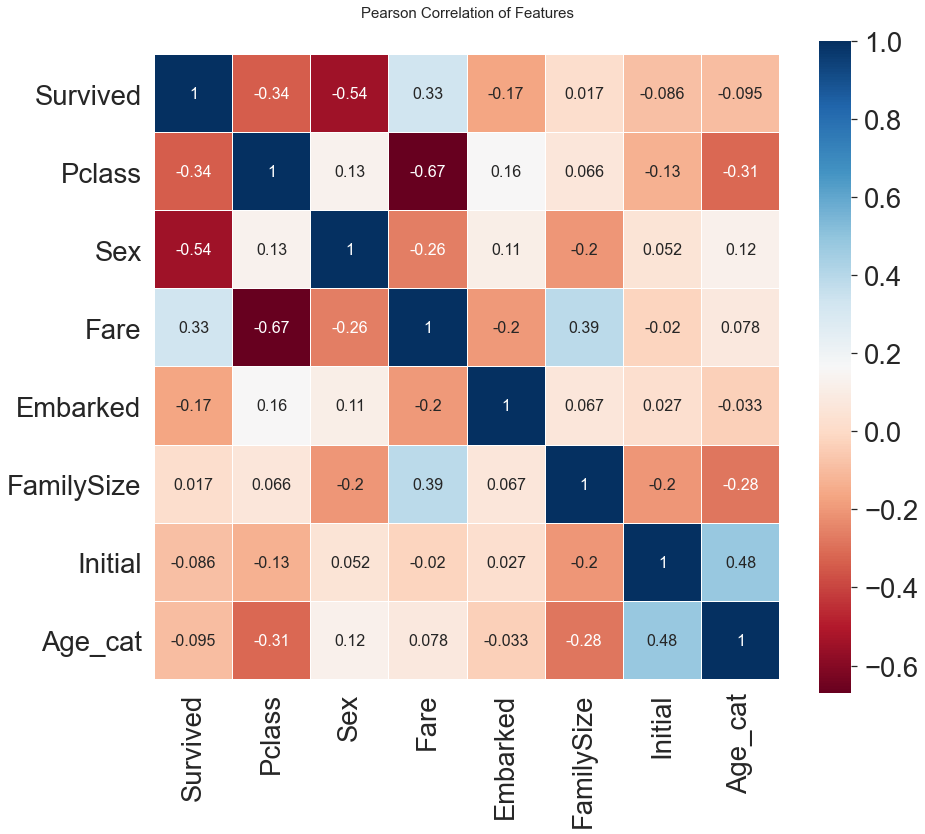

In [50]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare',
                        'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap = colormap, linecolor='white',annot=True,
           annot_kws={'size': 16})

del heatmap_data

- EDA 과정에서 보았듯이, Sex와 Pclass 가 Survived 에 상관관계가 있다.
- fare 와 embarked도 상관관계가 있다. 
- **중요 : 서로 강한 상관관계를 가지는 >0.7? feature들이 없다**
- 즉 불필요한 feature이 없이 모두 학습시켜야 한다. 
- 마지막 전처리를 하자. 힘내자!

#### 3.4 One-hot encoding on Initial and Embarked
- 모델의 성능을 높이기 위해 One-hot encoding을 해준다.
- 이는 카테고리별로 0~4 이런식으로 넣어도 되지만, 성능을 높이기 위해 (0,1)로 이루어진 n차원의 벡터로 나타내는 기법이다.
- pandas의 get_dummies를 사용하여 구현할 수 있다.

In [51]:
# Initial 에 one-hot encoding 적용
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [52]:
# Embarked 에 one-hot encoding 적용
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

#### 3.5 Drop columns
- 이제 처리한것 이외에 필요없는 것은 다 지우자.

In [53]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'],
             axis=1, inplace=True)


df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'],
            axis=1, inplace=True)

In [54]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [55]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,1,0,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,0,1,0,0,0,1
4,3,0,2.508582,3,2,0,0,1,0,0,0,0,1


# DieTanic -> Part 3 : redictive Modeling

1) Logistic Regression
2) SVM (Linear and radial  -> what they mean?)
3) Random Forest
4) K-Nearest Neighbours
5) Naive Bayes
6) Decision Tree
7) Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix



In [57]:
X_train = df_train.drop('Survived', axis=1).values
target_label=df_train['Survived'].values
X_test = df_test.values

In [65]:
data = df_train

In [70]:
train, test = train_test_split(data, test_size=0.3, random_state=0,
                              stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

Radial Support Vector Machines (rbf-SVM)

In [75]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


Linear Support Vector Machine (linear-SVM)

In [76]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8283582089552238


Logistic Regression

In [78]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy of the Logistic Regression is  0.8395522388059702


Decision Tree

In [79]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is  0.7761194029850746


K-Nearest Neighbors (KNN)

In [80]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8059701492537313


## Cross Validation

K-Fold Cross Validation 
1) dataset을 k-subsets로 나눈다
2) 5개로 나눴다고 쳤을 때 1개를 test, 4개를 train
3) 1-4 의 조합을 5가지로 하여 반복하고 accuracy / error은 평균값을 내어 해당 알고리즘의 평균 정확도를 계산한다
4) 이 방법으로 어떤 데이터에서는 overfit, underfit 되는 것을 평균을 내어 일반화시킬 수 있다.

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits = 10, random_state=22, shuffle=True)
xyz=[]
accuracy=[]
std=[]
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN',
              'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), 
         LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]


for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, 
                                    index=classifiers)

new_models_dataframe2

,CV Mean,Std
Linear Svm,0.829501,0.053847
Radial Svm,0.831748,0.052458
Logistic Regression,0.830587,0.036368
KNN,0.814894,0.049900
Decision Tree,0.782272,0.048220
Naive Bayes,0.752060,0.132838
Random Forest,0.812622,0.039906


<AxesSubplot:>

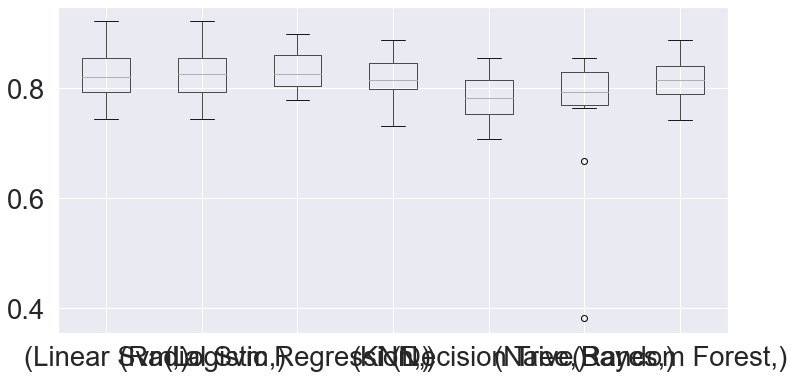

In [85]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

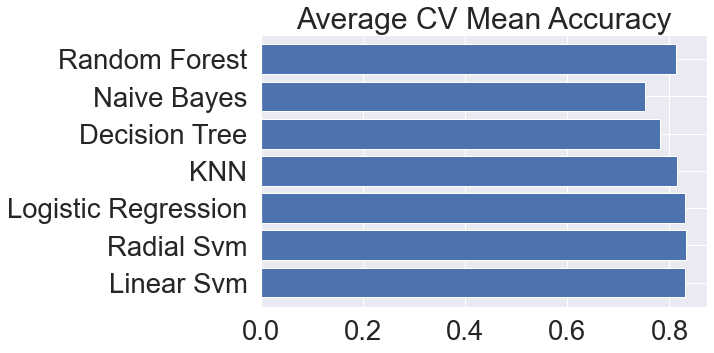

In [86]:
new_models_dataframe2['CV Mean'].plot.barh(width=.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

classification 들의 정확성은 imbalance 때문에 잘못될 수 있다. Confusion matrix를 통해서 어떤 모델이 잘못 되었거나 어떤 class 에서 모델이 잘못 예측했는지 알아볼 수 있다.

## Confusion Matrix
It gives the number of correct and incorrect classifications made by the classifier

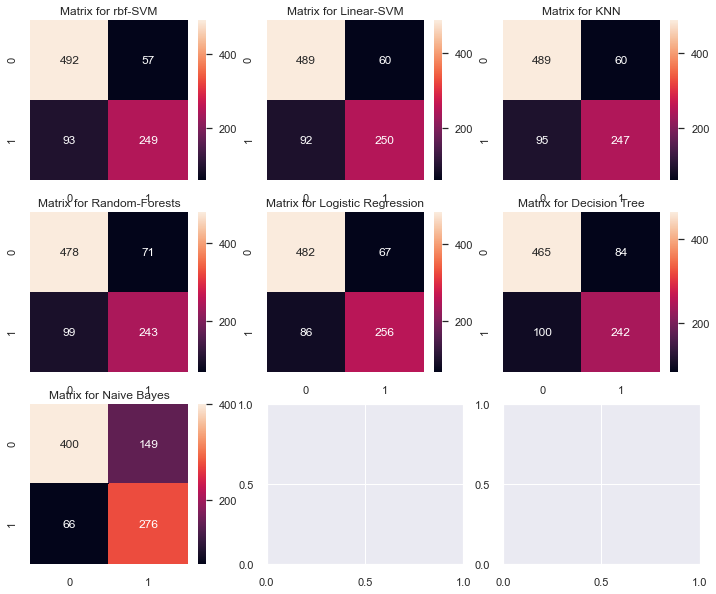

In [91]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True,
           fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
sns.set(font_scale=2) 
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [93]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.832772581758835
SVC(C=1, gamma=0.3)


In [94]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                 param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8047203565375682
RandomForestClassifier(random_state=0)


## Ensembling